In [19]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset into a DataFrame and select 500 rows at random
df = pd.read_csv('dataset.csv').sample(n=500)

# Drop irrelevant columns
df_cleaned = df.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'mode'])

# Handle missing values: drop rows with missing values
df_cleaned = df_cleaned.dropna()

# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Convert 'danceability' to binary labels (0 for not danceable, 1 for danceable)
#df_cleaned['danceability_binary'] = df_cleaned['danceability'].apply(lambda x: 1 if x > 0.5 else 0)

# Select relevant columns
######features = ['duration_ms', 'popularity', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'explicit']
#features = ['duration_ms', 'popularity', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'explicit']
features = ['liveness']
X = df_cleaned[features].copy()
y = df_cleaned['danceability']


# Normalize and standardize columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Display cleaned DataFrame info
df_cleaned.head()



,popularity,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
6390,19,243626,True,0.0658,0.99300,9,-2.484,0.1640,0.000697,0.2170,0.317,0.1070,199.986,4,black-metal
42527,13,58827,False,0.1690,0.89400,7,-2.267,0.1270,0.085400,0.8120,0.321,0.0309,116.244,4,grindcore
4445,56,234655,False,0.3640,0.00222,10,-35.497,0.0479,0.995000,0.9510,0.104,0.2990,135.805,3,ambient
62040,0,228234,False,0.5250,0.20500,0,-12.519,0.0457,0.840000,0.0213,0.114,0.2070,183.468,4,j-pop
47522,64,254133,False,0.4030,0.70900,9,-9.366,0.0885,0.074600,0.4940,0.132,0.6540,97.161,4,hard-rock


In [26]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 6390 to 109167
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        500 non-null    int64  
 1   duration_ms       500 non-null    int64  
 2   explicit          500 non-null    bool   
 3   danceability      500 non-null    float64
 4   energy            500 non-null    float64
 5   key               500 non-null    int64  
 6   loudness          500 non-null    float64
 7   speechiness       500 non-null    float64
 8   acousticness      500 non-null    float64
 9   instrumentalness  500 non-null    float64
 10  liveness          500 non-null    float64
 11  valence           500 non-null    float64
 12  tempo             500 non-null    float64
 13  time_signature    500 non-null    int64  
 14  track_genre       500 non-null    object 
dtypes: bool(1), float64(9), int64(4), object(1)
memory usage: 59.1+ KB
None


In [29]:
# Review the X variable DataFrame
print(X.head(10))
print(X.info())
print(X.describe())
print(X.columns)

        liveness
6390      0.3170
42527     0.3210
4445      0.1040
62040     0.1140
47522     0.1320
69423     0.0688
104314    0.6940
107614    0.3160
77148     0.9250
71310     0.2190
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 6390 to 109167
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   liveness  500 non-null    float64
dtypes: float64(1)
memory usage: 7.8 KB
None
         liveness
count  500.000000
mean     0.220591
std      0.197453
min      0.025100
25%      0.095950
50%      0.136000
75%      0.289500
max      0.987000
Index(['liveness'], dtype='object')


In [31]:
# Split the data into training and testing datasets by using

# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    random_state=1)

In [33]:
# Import the LinearRegression module from SKLearn
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
# Assign a random_state parameter of 1 to the model (not necessary, but for reproducibility)
lin_reg = LinearRegression(n_jobs=-1)  # n_jobs=-1 uses all available CPU cores

# Fit the model using training data
lin_reg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [35]:
# Make a prediction using the testing data
y_predict = lin_reg.predict(X_test)

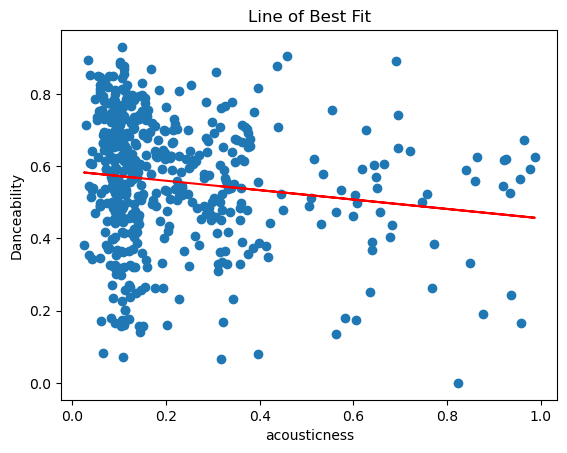

In [37]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create a linear regression model
lr_model = LinearRegression()

# Fit the model using the training data
lr_model.fit(X, y)

# Get the coefficients (slope and intercept)
slope = lr_model.coef_[0]
intercept = lr_model.intercept_

# Plot the data points
plt.scatter(X, y)

# Plot the line of best fit
plt.plot(X, slope * X + intercept, color='red')

# Set labels and title
plt.xlabel('acousticness')
plt.ylabel('Danceability')
plt.title('Line of Best Fit')

# Show the plot
plt.show()

In [39]:
###### features = ['duration_ms', 'popularity', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'explicit']

In [41]:
# Compute metrics for the linear regression model:  r2, mse, rmse, std
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")


The r2 is -0.03859404147230272.
The mean squared error is 0.024777633755945463.
The root mean squared error is 0.15740912856612052.
The standard deviation is 0.17616614355533824.


In [43]:
#### Hannah###
##Edit the x variables if needed to make a better fit if r^2 < 0.8 

##Could also use Random Forest Model or Logistic Regression, nut may need to change Danacability to a 0 or 1 in DF to use these models###

In [ ]:
##Sequel Stuff once uploaded to DataBricks

## Yalena